In [1]:
from pathlib import Path
from typing import Optional
import matplotlib.pyplot as plt

In [2]:
img_path = Path('..\Data\Cars_Dataset') # Downloaded from https://www.kaggle.com/datasets/kshitij192/cars-image-dataset

# Load data TensorFlow

In [3]:
import tensorflow as tf

def load_images_tf(img_path: Path, folder_name: str, image_size: tuple = (256, 256), batch_size: int = 32, validation_split: float = 0.)-> tf.data.Dataset:
    """
    Load images from a folder and return a tf.data.Dataset object.
    
    Args:
        img_path (Path): Path to the folder containing the images.
        folder_name (str): Name of the folder containing the images.
        image_size (tuple): Size of the images to be loaded.
        batch_size (int): Batch size for the dataset.
        validation_split (float): Fraction of the dataset to be used for validation.
        batch_size (int): Batch size for the dataset.
        validation_split (float): Fraction of the dataset to be used for validation.
        
    Returns:
        train_ds (tf.data.Dataset): Training dataset if validation_split is provided.
        val_ds (tf.data.Dataset): Validation dataset if validation_split is provided.
        test_df (tf.data.Dataset): Test dataset if validation_split is not provided.
    """
    
    # Load images from the folder
    if validation_split:
        train_ds = tf.keras.preprocessing.image_dataset_from_directory(
                    img_path / folder_name,
                    validation_split = validation_split,
                    subset = "training",
                    seed = 17,
                    image_size = image_size,
                    batch_size = batch_size)
        
        val_ds = tf.keras.preprocessing.image_dataset_from_directory(
                img_path / folder_name,
                validation_split = validation_split,
                subset = "validation",
                seed = 17,
                image_size = image_size,
                batch_size = batch_size)
        
        return train_ds, val_ds
    
    else:
        test_df = tf.keras.preprocessing.image_dataset_from_directory(
                img_path / folder_name,
                image_size = image_size,
                batch_size = batch_size)
        
        return test_df

In [4]:
train_ds, val_ds = load_images_tf(img_path, 'train', validation_split = 0.2, batch_size = 64, image_size = (128, 128))

Found 3352 files belonging to 7 classes.
Using 2682 files for training.
Found 3352 files belonging to 7 classes.
Using 670 files for validation.


In [5]:
images, labels = next(iter(train_ds))
print(images.shape, labels.shape)

(64, 128, 128, 3) (64,)


In [6]:
# Build a dictionary to map class indices to class names
class_dict = dict(zip(range(len(train_ds.class_names)), train_ds.class_names))
class_dict

{0: 'Audi',
 1: 'Hyundai Creta',
 2: 'Mahindra Scorpio',
 3: 'Rolls Royce',
 4: 'Swift',
 5: 'Tata Safari',
 6: 'Toyota Innova'}

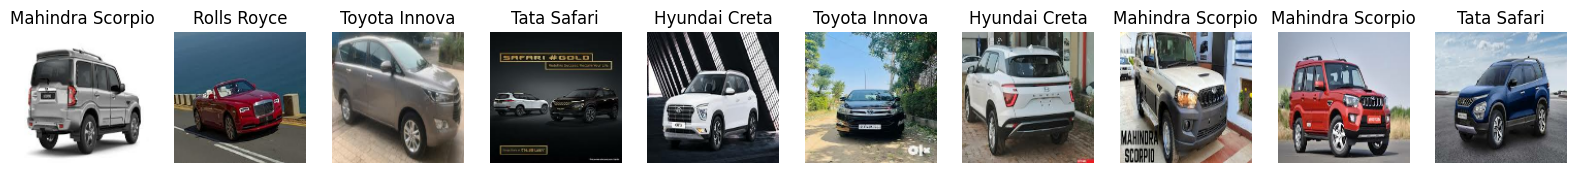

In [7]:
# Plot the 1st 9 images in the training dataset
plt.figure(figsize=(20, 20))
for i in range(10):
    ax = plt.subplot(1, 10, i + 1)
    plt.imshow(images[i].numpy().astype("uint8")) # Convert the tensor to a numpy array and display it
    plt.title(class_dict[int(labels[i])])
    plt.axis("off")
plt.show()

In [8]:
test_ds = load_images_tf(img_path, 'test', batch_size = 64, image_size = (128, 128))

Found 813 files belonging to 7 classes.


# Load data pytorch

In [9]:
import torch
from torchvision import datasets, transforms

def load_images_torch(img_path: Path, folder_name: str, image_size: tuple = (256, 256), batch_size: int = 32, validation_split: float = 0.)-> torch.utils.data.DataLoader:
    """
    Load images from a folder and return a torch.utils.data.DataLoader object.
    
    Args:
        img_path (Path): Path to the folder containing the images.
        folder_name (str): Name of the folder containing the images.
        image_size (tuple): Size of the images to be loaded.
        batch_size (int): Batch size for the dataset.
        validation_split (float): Fraction of the dataset to be used for validation.
        batch_size (int): Batch size for the dataset.
        validation_split (float): Fraction of the dataset to be used for validation.
        
    Returns:
        train_ds (torch.utils.data.DataLoader): Training dataset if validation_split is provided.
        val_ds (torch.utils.data.DataLoader): Validation dataset if validation_split is provided.
        test_df (torch.utils.data.DataLoader): Test dataset if validation_split is not provided.
    """
    
    # Define the transformations to be applied to the images
    transform = transforms.Compose([
                transforms.Resize(image_size), # Resize the images to the specified size
                transforms.ToTensor(), # Convert the images to tensors
                ])
    
    # Load the images from the folder
    dataset = datasets.ImageFolder(
        img_path / folder_name,
        transform = transform
    )
    
    print(f"Found {len(dataset)} images belonging to {len(dataset.classes)} classes.")
        
    # Split the dataset into training and validation sets
    if validation_split:
        train_ds, val_ds = torch.utils.data.random_split(
            dataset,
            [round((1 - validation_split) * len(dataset)), round(validation_split * len(dataset))]
        )

        # Build training and validation dataloaders
        train_dataloader = torch.utils.data.DataLoader(
            train_ds,
            batch_size=batch_size,
            shuffle=True
        )
        
        print(f"Using {len(train_dataloader.dataset)} files for training.")
        
        val_dataloader = torch.utils.data.DataLoader(
            val_ds,
            batch_size=batch_size,
            shuffle=True
        )
        
        print(f"Using {len(val_dataloader.dataset)} files for validation.")
        
        # Add class names to the dataloader
        train_dataloader.class_names = dataset.classes
        val_dataloader.class_names = dataset.classes

        return train_dataloader, val_dataloader
    
    else:
        # Build a test dataloader
        test_dataloader = torch.utils.data.DataLoader(
            dataset,
            batch_size=batch_size,
            shuffle=True
        )
        # Add class names to the dataloader
        test_dataloader.class_names = dataset.classes
        
        return test_dataloader

In [10]:
train_ds, val_ds = load_images_torch(img_path, 'train', validation_split = 0.2, batch_size = 64, image_size = (128, 128))

Found 3352 images belonging to 7 classes.
Using 2682 files for training.
Using 670 files for validation.


In [11]:
images, labels = next(iter(train_ds))
print(images.shape, labels.shape)

torch.Size([64, 3, 128, 128]) torch.Size([64])


In [12]:
# Build a dictionary to map class indices to class names
class_dict = dict(zip(range(len(train_ds.class_names)), train_ds.class_names))
class_dict

{0: 'Audi',
 1: 'Hyundai Creta',
 2: 'Mahindra Scorpio',
 3: 'Rolls Royce',
 4: 'Swift',
 5: 'Tata Safari',
 6: 'Toyota Innova'}

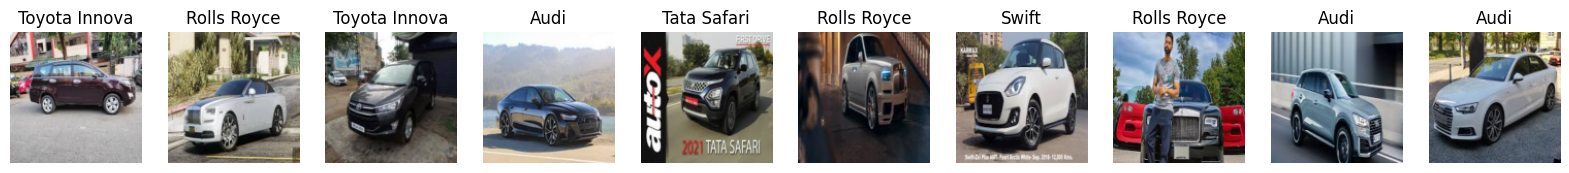

In [13]:
# Plot the 1st 9 images in the training dataset
plt.figure(figsize=(20, 20))
for i in range(10):
    ax = plt.subplot(1, 10, i + 1)
    plt.imshow(images[i].permute(1, 2, 0)) # Permute the dimensions of the tensor to (height, width, channels) and display it
    plt.title(class_dict[int(labels[i])])
    plt.axis("off")
plt.show()

In [14]:
test_ds = load_images_torch(img_path, 'test', batch_size = 64, image_size = (128, 128))

Found 813 images belonging to 7 classes.


# Remove background

In [15]:
import rembg
import cv2
import numpy as np

def remove_background(image: np.array, convert_to_rgb: bool = True, return_background: bool = False)-> tuple[np.array, Optional[np.array]]:
    """
    Remove the background from an image using the rembg library.
    
    Args:
        image (np.array): Image to remove the background from.
        convert_to_rgb (bool): Whether to convert the image to RGB format.
        return_background (bool): Whether to return the background mask.
    
    Returns:
        image_without_background (np.array): Image with the background removed.
        background (np.array): Background mask if return_background is True.
    """
    
    # Remove the background from the image
    image_without_background = rembg.remove(image)
    
    if return_background:
        # Pick the mask for background removal
        background = image_without_background[:, :, -1].copy()
    
    if convert_to_rgb:
        # Convert the image to RGB
        image_without_background = cv2.cvtColor(image_without_background, cv2.COLOR_RGBA2RGB)
    
    if return_background:
        return image_without_background, background
    else:
        return image_without_background

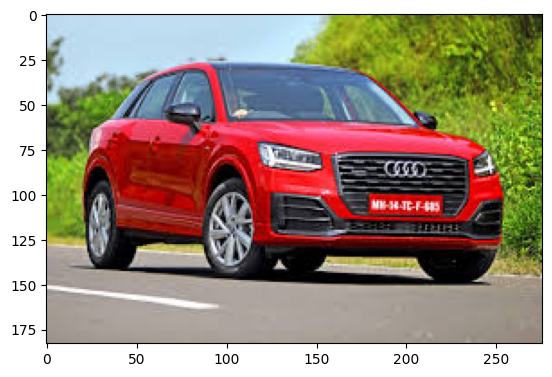

In [16]:
from PIL import Image

image = np.array(Image.open(img_path / 'train' / 'Audi' / '11.jpg'))
plt.imshow(image)
plt.show()

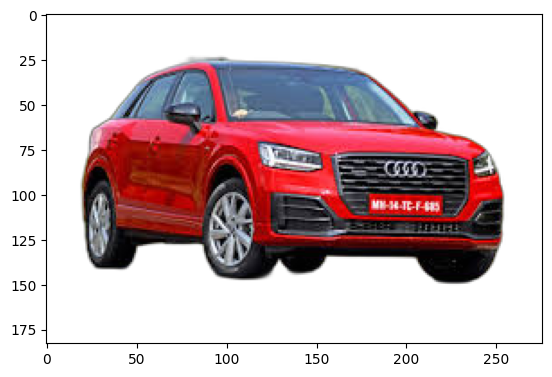

In [17]:
# Remove the background from the image in the RGBA format
image_without_background = remove_background(image, convert_to_rgb=False)
plt.imshow(image_without_background)
plt.show()

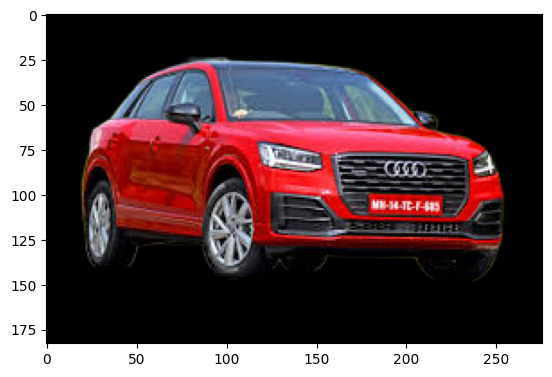

In [18]:
# Remove the background from the image in the RGB format
image_without_background = remove_background(image, convert_to_rgb=True)
plt.imshow(image_without_background)
plt.show()

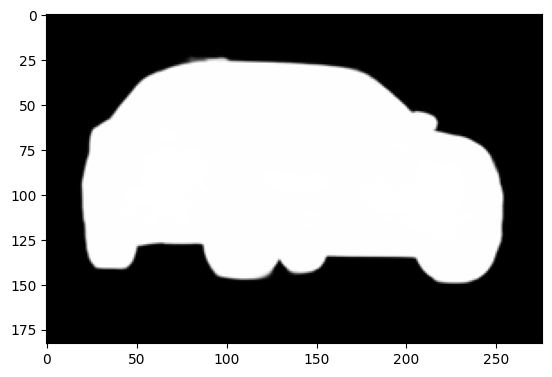

In [19]:
# Remove the background from the image and return the background mask
image_without_background, background = remove_background(image, return_background=True)
plt.imshow(background, cmap='gray')
plt.show()

# Color mask

In [26]:
import cv2
import numpy as np

def build_mask(image: np.array, colormin: tuple=(0,0,0), colormax:tuple =(255,255,255))-> tuple[np.array, np.array]:
    """
    Build a mask for the image using the specified color range in hsv scale.
    
    Args:
        image (np.array): Image for which the mask is to be built.
        colormin (tuple): Minimum color range for the mask.
        colormax (tuple): Maximum color range for the mask.
        
    Returns:
        masked_image (np.array): Image with the mask applied.
        mask (np.array): Mask for the image.
    """
    
    # Convert the image to the HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    # Threshold the HSV image to get only colors in the specified range
    mask = cv2.inRange(hsv, colormin, colormax)
    
    # Add alpha channel to the image
    masked_image = np.append(image, np.expand_dims(mask,-1), axis=-1)
    
    return masked_image, mask

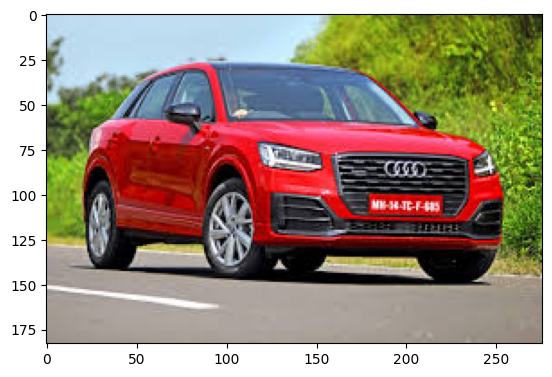

In [27]:
from PIL import Image
import numpy as np

image = np.array(Image.open(img_path / 'train' / 'Audi' / '11.jpg'))
plt.imshow(image)
plt.show()

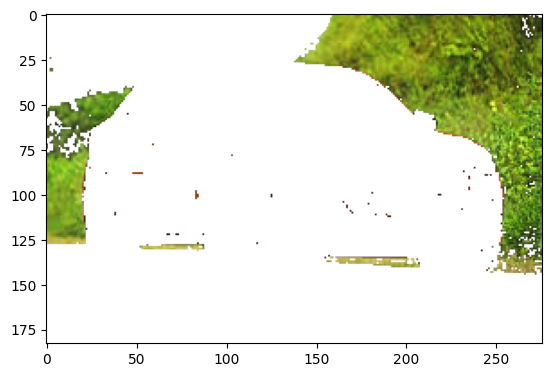

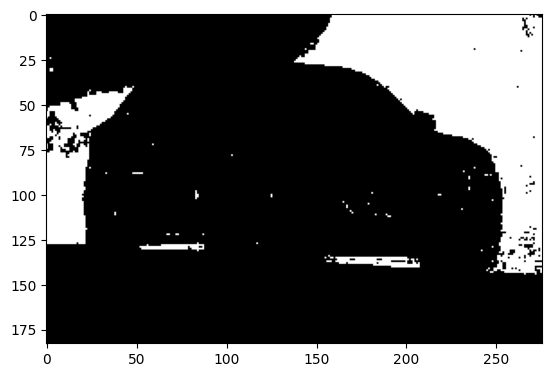

In [28]:
# Extract green colors from the image
masked_image, mask = build_mask(image, colormin=(10,120,40), colormax=(50,255,255))
plt.imshow(masked_image)
plt.show()
plt.imshow(mask, cmap='gray')
plt.show()